# PART 3
---

Objective: Benchmark your model against the SOA with the full dataset now available.

In [1]:
COLLAB = False
if COLLAB:
    !pip install -U datasets transformers evaluate transformers-interpret

In [ ]:
# Standard Library
import json
import random
import warnings
from pathlib import Path

# Third-Party Libraries
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from datasets import load_dataset, load_from_disk
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
)
from transformers_interpret import SequenceClassificationExplainer

# Local Modules
from utils import (
    Metrics,
    create_args_training,
    train_and_predict,
)

# Suppress warnings and set Seaborn style
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set_palette("Spectral")

if COLLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    OUTPUT_DIR = "/content/drive/MyDrive/NLP_trial_final_project/abstracts"
else:
    OUTPUT_DIR = "./results"


In [3]:
if Path(f"{OUTPUT_DIR}/dataset_patents_abstracts").exists():
  dataset = load_from_disk(f"{OUTPUT_DIR}/dataset_patents_abstracts")
else:
  dataset = load_dataset("ccdv/patent-classification", "abstract")
  dataset.save_to_disk(f"{OUTPUT_DIR}/dataset_patents_abstracts")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
})

# 3.A. Full Dataset Training (0.25 points):
Incrementally train your model with varying percentages of the full dataset (1%, 10%, 25%, 50%, 75%, and 100%). Record the results.

In [5]:
n_classes = len(set(dataset['train']['label']))
n_classes

9

In [6]:
model_ckpt   = "FacebookAI/roberta-base"
num_labels   = n_classes
max_length   = 256
batch_size   = 64
seed         = 42

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
set_seed(seed)

In [7]:
if Path(f"{OUTPUT_DIR}/dataset_patents_abstracts_tokenized_{model_ckpt}").exists():
  dataset = load_from_disk(f"{OUTPUT_DIR}/dataset_patents_abstracts_tokenized_{model_ckpt}")
  dataset.set_format("torch")
else:
  tok = AutoTokenizer.from_pretrained(model_ckpt)
  def tokenize(batch):
      return tok(batch["text"], padding="max_length", truncation=True, max_length=max_length)

  dataset = dataset.map(tokenize, batched=True, remove_columns=["text"])
  dataset = dataset.rename_column("label", "labels")
  dataset.set_format("torch")
  dataset.save_to_disk(f"{OUTPUT_DIR}/dataset_patents_abstracts_tokenized_{model_ckpt}")

In [16]:
results = Metrics()
predictions = {}
for train_proportion in [0.01, 0.1, 0.25, 0.5, 0.75, 1]:
    print(f"Training with {train_proportion * 100}% of the training data")
    args = create_args_training(n_epochs=20,
                                output_dir= f"{OUTPUT_DIR}/{model_ckpt}/results_{train_proportion*100}"
                                )
    results, y_pred, y_true = train_and_predict(dataset, model_ckpt, args, results, train_proportion)
    predictions[train_proportion] = {
        "y_pred": y_pred,
        "y_true": y_true
    }
    with open( f"{OUTPUT_DIR}/{model_ckpt}/predictions.json", "w") as f:
        json.dump(predictions, f)

Training with 1.0% of the training data
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 243
    })
})


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall
1,2.206300,2.248288,0.069400,0.004816,0.069400
2,2.209300,2.240135,0.069400,0.004816,0.069400
3,2.200400,2.232542,0.069400,0.004816,0.069400
4,2.192500,2.223385,0.069200,0.004822,0.069200
5,2.189000,2.208790,0.064800,0.051615,0.064800
6,2.165100,2.193101,0.141200,0.214876,0.141200
7,2.160200,2.170059,0.217000,0.416262,0.217000
8,2.117300,2.136817,0.243600,0.347767,0.243600
9,2.066600,2.087464,0.266000,0.370000,0.266000
10,2.004200,2.036261,0.268000,0.367518,0.268000


Training with 10.0% of the training data
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 2500
    })
})


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall
1,1.992700,1.679603,0.427000,0.378113,0.427000
2,1.531200,1.422993,0.500000,0.512372,0.500000
3,1.303300,1.256591,0.567800,0.517719,0.567800
4,1.141300,1.207235,0.583000,0.549857,0.583000
5,1.020100,1.190204,0.602200,0.569869,0.602200
6,0.916100,1.174880,0.611000,0.574764,0.611000
7,0.795900,1.192023,0.611000,0.582446,0.611000
8,0.751900,1.218098,0.611200,0.572659,0.611200
9,0.642400,1.225809,0.614200,0.580482,0.614200


Training with 25.0% of the training data
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 6250
    })
})


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall
1,1.695500,1.328649,0.530200,0.491656,0.530200
2,1.229000,1.158492,0.603200,0.577012,0.603200
3,1.051100,1.115240,0.632600,0.588610,0.632600
4,0.925900,1.085082,0.642200,0.602700,0.642200
5,0.808300,1.112141,0.635600,0.598959,0.635600
6,0.721000,1.119664,0.641400,0.613419,0.641400
7,0.631800,1.156864,0.632400,0.612883,0.632400


Training with 50.0% of the training data
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 12500
    })
})


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall
1,1.488300,1.122657,0.621000,0.594375,0.621000
2,1.067800,1.032956,0.650800,0.628121,0.650800
3,0.925600,1.035700,0.653800,0.621964,0.653800
4,0.819300,1.031308,0.660800,0.629427,0.660800
5,0.725400,1.100658,0.645200,0.623268,0.645200
6,0.635000,1.099543,0.653800,0.636445,0.653800
7,0.559300,1.149853,0.653000,0.630687,0.653000


Training with 75.0% of the training data
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 18750
    })
})


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall
1,1.372700,1.052384,0.640800,0.594054,0.640800
2,1.001800,1.023952,0.641800,0.619292,0.641800
3,0.881400,0.982045,0.664800,0.634227,0.664800
4,0.783300,0.999609,0.663200,0.645168,0.663200
5,0.696300,1.012704,0.667400,0.640747,0.667400
6,0.614400,1.058642,0.673000,0.643830,0.673000


Training with 100% of the training data
DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 25000
    })
})


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall
1,1.273800,1.033373,0.652000,0.623480,0.652000
2,0.966500,0.968537,0.671800,0.639577,0.671800
3,0.856300,0.953039,0.679400,0.648488,0.679400
4,0.759900,0.969254,0.669200,0.645561,0.669200
5,0.676300,0.984817,0.675200,0.650285,0.675200
6,0.595800,1.017086,0.677200,0.652827,0.677200


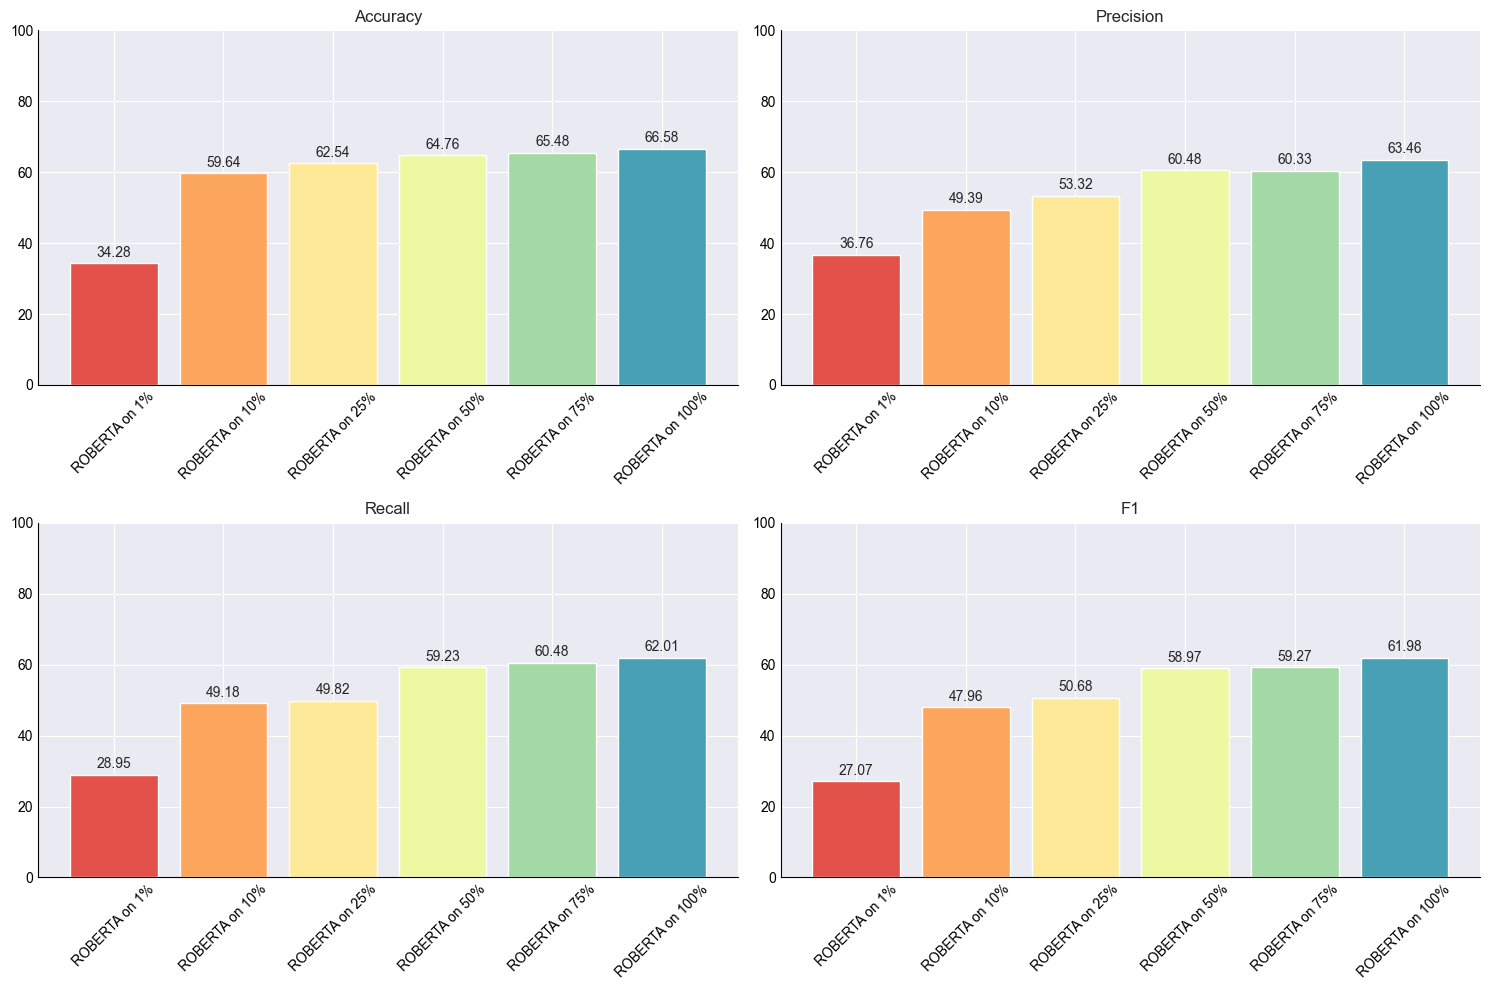

In [ ]:
results.plot(save_plot_path=f"{OUTPUT_DIR}/{model_ckpt}/results_test.png")

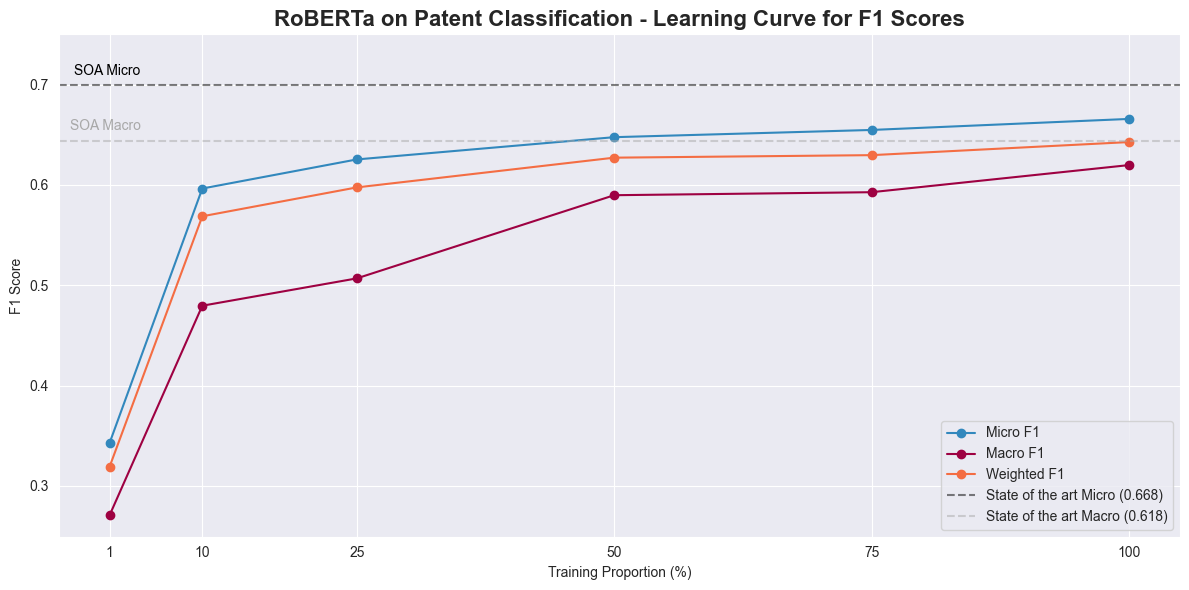

In [117]:
json_path = "results/FacebookAI/roberta-base/predictions.json"
predictions = json.load(open(json_path, "r"))
micro_f1_results = []
macro_f1_results = []
weighted_f1_results = []
for train_proportion, pred in predictions.items():
    prop = str(int(float(train_proportion)* 100))
    y_pred = pred["y_pred"]
    y_true = pred["y_true"]
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    weighted_f1 = f1_score(y_true, y_pred, average='weighted')
    micro_f1_results.append(micro_f1)
    macro_f1_results.append(macro_f1)
    weighted_f1_results.append(weighted_f1)

#make a plot with title learning curve

#use 
plt.figure(figsize=(12, 6))
plt.plot([1, 10, 25, 50, 75, 100], micro_f1_results, label='Micro F1', marker='o', color="#3288bd")
plt.plot([1, 10, 25, 50, 75, 100], macro_f1_results, label='Macro F1', marker='o', color="#9e0142")
plt.plot([1, 10, 25, 50, 75, 100], weighted_f1_results, label='Weighted F1', marker='o', color="#f46d43")
#add hline at 0.66
plt.axhline(y=0.7, color='black', linestyle='--', alpha=0.5, label='State of the art Micro (0.668)')
plt.axhline(y=0.644, color='darkgrey', linestyle='--', alpha=0.5, label='State of the art Macro (0.618)')
#add am x
plt.title('RoBERTa on Patent Classification - Learning Curve for F1 Scores', fontsize=16, fontweight='bold')
plt.xlabel('Training Proportion (%)')
plt.ylabel('F1 Score')
#add y tick at 0.666 with tick SOA Micro and 0.618 with tick SOA Macro
plt.text(4, 0.71, 'SOA Micro', fontsize=10, color='black', ha='right')
plt.text(4, 0.655, 'SOA Macro', fontsize=10, color='darkgrey', ha='right')

plt.ylim(None, 0.75)
plt.xticks([1, 10, 25, 50, 75, 100])
plt.grid(False)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/{model_ckpt}/learning_curve_f1_scores.png")
plt.show()


## Inside RoBERTA - Understanding predictions

In [ ]:
original_dataset = load_from_disk(f"{OUTPUT_DIR}/dataset_patents_abstracts")

In [ ]:
BEST_MODEL = f"{OUTPUT_DIR}/{model_ckpt}/results_100/checkpoint-1176"
model = AutoModelForSequenceClassification.from_pretrained(BEST_MODEL)
model.to(torch.float32) # Ensure model is in float32 for compatibility
model.eval()

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
trainer = Trainer(model=model, tokenizer=tokenizer)

predictions = trainer.predict(dataset["test"])
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

In [ ]:
correct_predictions = [(text, true_label, pred_label)
                    for text, true_label, pred_label in zip(original_dataset['test']['text'], y_true, y_pred)
                    if true_label == pred_label
                    ][:5]

wrong_predictions = [(text, true_label, pred_label)
                    for text, true_label, pred_label in zip(original_dataset['test']['text'], y_true, y_pred)
                    if true_label != pred_label
                    ][:5]


In [34]:
# Load examples
BEST_MODEL = f"{OUTPUT_DIR}/{model_ckpt}/results_100/checkpoint-1176"
model = AutoModelForSequenceClassification.from_pretrained(BEST_MODEL)
model.eval()
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
# Create explainer
explainer = SequenceClassificationExplainer(model, tokenizer)

In [35]:
print("CORRECT PREDICTIONS ===================================")
for text, true_label, pred_label in correct_predictions:
# text, true_label, pred_label = examples[0][0], examples[0][1], examples[0][2]
    word_attributions = explainer(text)

    CLASS_NAMES = {
        0: "Human Needs", 1: "Operations & Transport", 2: "Chemistry & Metallurgy",
        3: "Textiles & Paper", 4: "Construction", 5: "Mechanical & Thermal Engineering",
        6: "Physics", 7: "Electricity", 8: "Cross-Tech Tagging"
    }

    explainer.visualize(true_class=CLASS_NAMES[true_label])

CORRECT PREDICTIONS ===================================


For the correct predictions, it is interesting to notice the following:
1. The confidence level is above 0.7 on average
2. The model is able to distinguish the most relevant postivice tokens of each abstract: `building`, `'device`, `head assembly`, `polymer`, `reading information`, `producing`, `pressure`, among others.


In [33]:
print("INCORRECT PREDICTIONS ===================================")
for text, true_label, pred_label in wrong_predictions:
# text, true_label, pred_label = examples[0][0], examples[0][1], examples[0][2]
    word_attributions = explainer(text)

    CLASS_NAMES = {
        0: "Human Needs", 1: "Operations & Transport", 2: "Chemistry & Metallurgy",
        3: "Textiles & Paper", 4: "Construction", 5: "Mechanical & Thermal Engineering",
        6: "Physics", 7: "Electricity", 8: "Cross-Tech Tagging"
    }

    explainer.visualize(true_class=CLASS_NAMES[true_label])

INCORRECT PREDICTIONS ===================================


In contrast to the correct predictions, in this case we can see:
1. Way lower scores (reaching 0.35) and the average around 0.59. 
2. There are some really miselading abstracts, also for the human eye, such as the second example, where `polymer` and `chemical` have a high positive score associated with Chemestry & Metallurgy while the true class was Operations and Transport.
3. The modell still has some wrong attention, as it can be seen in the 4th case, where `well` is giving a high score to classify that instance as Construction when it is from Cross-Tech Tagging.

# 3.B.